In [1]:
#packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load files
df_council = pd.read_csv('NYC_City_Council.csv')
df_benefits = pd.read_csv('NYC_Benefits_Programs.csv')

In [3]:
df_council.head()

,id,guid,memberid,firstname,lastname,fullname,committeeid,committeename,committee_active,membertypeid,title,memberactive,startdate,enddate,version,lastupdatedutc
0,3847,0879114D-8CE1-4084-B7F5-F3C36188D1AF,7562,Margaret S.,Chin,Margaret S. Chin,3,Committee on Aging,True,1,Chairperson,True,2018-01-11 0:00:00,2021-12-31 0:00:00,AAAAAOV8hOg=,2018-01-11 15:10:04
1,3848,D7991589-B5CC-4555-9CC4-55E7B9BD855D,7742,Diana,Ayala,Diana Ayala,3,Committee on Aging,True,3,Committee member,True,2018-01-11 0:00:00,2021-12-31 0:00:00,AAAAAOV8hVU=,2018-01-11 15:10:34
2,3849,FB647542-EA29-4A04-88CF-AA9D4C353305,7629,Chaim M.,Deutsch,Chaim M. Deutsch,3,Committee on Aging,True,3,Committee member,True,2018-01-11 0:00:00,2021-12-31 0:00:00,AAAAAOV8hVY=,2018-01-11 15:11:44
3,3850,6DCA54ED-5EEE-4F6A-B949-41159C1E49CF,7744,Ruben,"Diaz, Sr.","Ruben Diaz, Sr.",3,Committee on Aging,True,3,Committee member,True,2018-01-11 0:00:00,2021-12-31 0:00:00,AAAAAOV8hVc=,2018-01-11 15:12:40
4,3851,414B764F-15FC-4F7A-8047-0CA22C39490F,7563,Daniel,Dromm,Daniel Dromm,3,Committee on Aging,True,3,Committee member,False,2018-01-11 0:00:00,2019-04-09 0:00:00,AAAAAOXMh5U=,2018-01-11 15:13:09


In [4]:
df_council.dtypes

id                   int64
guid                object
memberid             int64
firstname           object
lastname            object
fullname            object
committeeid          int64
committeename       object
committee_active      bool
membertypeid         int64
title               object
memberactive          bool
startdate           object
enddate             object
version             object
lastupdatedutc      object
dtype: object

In [5]:
#drop unneeded columns
df_council.drop(columns=['version', 'guid', 'fullname', 'membertypeid', 'lastupdatedutc'],axis=1, inplace=True)

In [6]:
#taking out the 0:00:00 from date columns
df_council['startdate'] = df_council['startdate'].str.replace("\s0:00:00", "")
df_council['enddate'] = df_council['enddate'].str.replace("\s0:00:00", "")

In [7]:
df_council.head()

,id,memberid,firstname,lastname,committeeid,committeename,committee_active,title,memberactive,startdate,enddate
0,3847,7562,Margaret S.,Chin,3,Committee on Aging,True,Chairperson,True,2018-01-11,2021-12-31
1,3848,7742,Diana,Ayala,3,Committee on Aging,True,Committee member,True,2018-01-11,2021-12-31
2,3849,7629,Chaim M.,Deutsch,3,Committee on Aging,True,Committee member,True,2018-01-11,2021-12-31
3,3850,7744,Ruben,"Diaz, Sr.",3,Committee on Aging,True,Committee member,True,2018-01-11,2021-12-31
4,3851,7563,Daniel,Dromm,3,Committee on Aging,True,Committee member,False,2018-01-11,2019-04-09


In [8]:
df_benefits.head()

,unique_id,program_code,language,program_name,program_acronym,page_type,program_category,government_agency,population_served,age_group,...,required_documents_summary,get_help_summary,get_help_in_person,get_help_online,get_help_by_email,get_help_by_calling_other_than_311,get_help_by_calling_311,how_to_apply_or_enroll_by_phone,apply_by_mail_call_to_action,url_of_pdf_application_forms
0,P064en,NaN,English,Living for the Young Family Through Education,LYFE,Program,Child Care,NYC Department of Education/District 79,"Children (0-13),Families,Immigrants,NYCHA resi...","Caregiver,Baby,Toddler,Pre-Schooler",...,<ul><li>Proof of your child's age</li><li>A cu...,"<ul><li>Visit the <a href=""http://lyfenyc.org/...",<p><strong>Visit Central Office</strong></p><p...,<p><strong>Visit the website</strong></p><p>Vi...,<p><strong>Email LYFE</strong></p><p>Email LYF...,<p><strong>Call the office</strong></p><p>Call...,<p><strong>Call 311</strong></p><p>Ask about t...,NaN,NaN,NaN
1,P139en,NaN,English,NYS Paid Family Leave,PFL,Benefit,Child Care,NYS Workers' Compensation Board,"Families,Immigrants,Pregnant & new parents,COV...",NaN,...,<p><strong>You'll need different documents dep...,NaN,NaN,<p><strong>Visit the websites</strong></p><p>L...,NaN,<p><strong>Call the Paid Family Leave Helpline...,NaN,NaN,NaN,NaN
2,P140en,NaN,English,Family Type Homes for Adults,FTHA,Program,Housing,NYS Office of Children and Family Services (OF...,"People with disabilities,Seniors",NaN,...,NaN,NaN,NaN,<p><strong>Visit the Website</strong></p><p>Re...,NaN,<p><strong>Information on FTHA placements</str...,<p><strong>Call 311 </strong></p><p>Ask about ...,<p>Referrals to the FTHA program typically com...,NaN,NaN
3,P138en,NaN,English,Family Homelessness and Eviction Prevention Su...,FHEPS,Benefit,Housing,"Department of Social Services (DSS), Departmen...","Families,People with disabilities,Pregnant & n...",NaN,...,<p>Your caseworker will work with you to colle...,NaN,<p><strong>In person</strong></p><p>If you liv...,<p><strong>Visit the website</strong></p><p>Le...,NaN,<p><strong>Call HRA</strong></p><p>Families wh...,<p><strong>Call 311</strong></p><p>If you're a...,NaN,NaN,NaN
4,P052en,NaN,English,School's Out NYC,SONYC,Program,Enrichment,NYC Department of Youth & Community Development,Youth (10+),"Pre-Teen,Teen",...,NaN,"<ul><li>Visit the <a href=""https://www1.nyc.go...",<p><strong>Visit your child's school</strong><...,<p><strong>Visit the websites</strong></p><p>V...,NaN,<p><strong>Call Youth Connect</strong></p><p>C...,NaN,NaN,NaN,NaN


In [9]:
#drop unneeded columns
df_benefits.drop(columns=['program_code', 'language', 'age_group', 'get_help_by_calling_311', 
                          'get_help_by_calling_other_than_311', 'get_help_by_email', 'get_help_online',
                         'get_help_in_person', 'get_help_summary', 'required_documents_summary',
                         'how_to_apply_or_enroll_by_phone', 'office_locations_url',
                         'apply_in_person_call_to_action', 'how_to_apply_or_enroll_in_person'],axis=1, inplace=True)

In [10]:
df_benefits.drop(columns=['url_of_pdf_application_forms', 'apply_by_mail_call_to_action',
                         'how_to_apply_or_enroll_by_mail', 'url_of_online_application',
                         'apply_online_call_to_action', 'how_to_apply_or_enroll_online',
                         'how_to_apply_summary'],axis=1, inplace=True)

In [11]:
df_benefits.head()

,unique_id,program_name,program_acronym,page_type,program_category,government_agency,population_served,plain_language_program_name,program_description,brief_excerpt,heads_up,plain_language_eligibility
0,P064en,Living for the Young Family Through Education,LYFE,Program,Child Care,NYC Department of Education/District 79,"Children (0-13),Families,Immigrants,NYCHA resi...",Early childhood education and support services,"<p>LYFE empowers parents in continuing, or rec...",<p>Student parents can get free early childhoo...,<ul><li>Services are free to all eligible fami...,<p>You may be eligible for LYFE if you answer ...
1,P139en,NYS Paid Family Leave,PFL,Benefit,Child Care,NYS Workers' Compensation Board,"Families,Immigrants,Pregnant & new parents,COV...",Paid time off to care for family,<p><strong>Paid Family Leave (PFL)</strong> gi...,<p>Up to 12 weeks of paid time off to care for...,<p><strong>Update: </strong>Paid Leave may be ...,<p>NY State Paid Family Leave is available to ...
2,P140en,Family Type Homes for Adults,FTHA,Program,Housing,NYS Office of Children and Family Services (OF...,"People with disabilities,Seniors",Homes for adults who cannot live alone,<p>Family-Type Home for Adults (FTHA) are stat...,<p>Supportive housing for adults who cannot li...,<ul><li>FTHA homes are for adults who cannot l...,"<p><strong>To be considered for FTHA housing, ..."
3,P138en,Family Homelessness and Eviction Prevention Su...,FHEPS,Benefit,Housing,"Department of Social Services (DSS), Departmen...","Families,People with disabilities,Pregnant & n...",Help with rent for families with children,<p>FHEPS is a rent supplement for families who...,<p>Pays part of or all of the rent to eligible...,<p><strong>Update: </strong>Families who are a...,<p><strong>Your family must include one of the...
4,P052en,School's Out NYC,SONYC,Program,Enrichment,NYC Department of Youth & Community Development,Youth (10+),After school for middle schoolers,<p>SONYC is an after school program for studen...,"<p>SONYC offers a mix of activities, including...",<ul><li>Young people can take part in programs...,"<p>All NYC students, in 6th, 7th, and 8th grad..."


In [12]:
df_benefits.dtypes

unique_id                      object
program_name                   object
program_acronym                object
page_type                      object
program_category               object
government_agency              object
population_served              object
plain_language_program_name    object
program_description            object
brief_excerpt                  object
heads_up                       object
plain_language_eligibility     object
dtype: object

In [13]:
df_council.dtypes

id                   int64
memberid             int64
firstname           object
lastname            object
committeeid          int64
committeename       object
committee_active      bool
title               object
memberactive          bool
startdate           object
enddate             object
dtype: object

In [14]:
#402 rows of city council
df_council.shape[0]

402

In [15]:
#11 columns
df_council.shape[1]

11

In [16]:
#102 rows of benefits/programs
df_benefits.shape[0]

102

In [17]:
#12 columns
df_benefits.shape[1]

12

Exploartion of Benefits dataframe df_benefits

In [18]:
df_benefits['program_category'].value_counts()

Cash & expenses             19
Health                      15
Education                   13
Family Services             12
Work                        10
Housing                     10
Food                         8
Child Care                   6
Enrichment                   5
People with Disabilities     3
City ID Card                 1
Name: program_category, dtype: int64

In [19]:
df_benefits['page_type'].value_counts()

Program     49
Service     24
Benefit     20
Resource     9
Name: page_type, dtype: int64

In [20]:
# 2 agencies with 12 programs = 24
# 1 agency with 9 programs = 9
# 1 agency with 8 programs = 8
# 2 agencies with 5 programs = 10

# 1 agency with 4 programs = 4
# 2 agencies with 3 programs = 6
# 5 agencies with 2 programs = 10
# 31 agencies with 1 program = 31
df_benefits['government_agency'].value_counts()

NYC Department of Education                                                                                         12
NYC Human Resources Administration                                                                                  12
NYC Department of Youth & Community Development                                                                      9
NYC Department of Health & Mental Hygiene                                                                            8
NYS Department of Health                                                                                             5
NYC Health + Hospitals                                                                                               5
NYC Housing Authority                                                                                                4
NYC Department of Finance                                                                                            3
NYC Department of Consumer and Worker Protection

In [21]:
#top 4 agencies and number of programs
24+9+8+10

51

In [22]:
#bottom 4 agencies and number of programs
4+6+10+31

51

In [23]:
# 13% of the gorvernment agencies produce 50% of the benefits and programs 
6/45

0.13333333333333333

In [24]:
# only taking part of the dataframe - only want the top 50% of agencies making programs
df_b = df_benefits[(df_benefits['government_agency'] == "NYC Department of Education") |
       (df_benefits['government_agency'] == "NYC Human Resources Administration") |
       (df_benefits['government_agency'] == "NYC Department of Youth & Community Development") |
       (df_benefits['government_agency'] == "NYC Department of Health & Mental Hygiene")]

In [35]:
df_b.tail()

,unique_id,program_name,program_acronym,page_type,program_category,government_agency,population_served,plain_language_program_name,program_description,brief_excerpt,heads_up,plain_language_eligibility
90,P101en,Career & Technical Education,CTE,Program,Education,NYC Department of Education,"Children (0-13),Students,Youth (10+)",Career training for students,<p>Career and technical education (CTE) lets s...,<p>Students gain hands-on career training whil...,<ul><li>CTE is available at designated <a href...,<p>To be eligible to apply for a NYC public hi...
93,P059en,Outpatient Treatment Services,NaN,Service,Health,NYC Department of Health & Mental Hygiene,"Children (0-13),Immigrants,NYCHA residents,Peo...",Youth mental health care,<p>Young people can get mental health care nea...,"<p>Help for young people who have emotional, b...",<p>There are two major types of outpatient men...,<p>Clinic treatment is available for:</p><ul><...
99,P020en,SchoolFood,NaN,Program,Food,NYC Department of Education,"Children (0-13),Immigrants,Students,Youth (10+)",Free school breakfast and lunch,<p>The New York City Department of Education i...,<p>NYC students can enjoy free breakfast and l...,<ul><li>Families no longer need to fill out ap...,NaN
100,P030en,Summer Youth Employment Program,SYEP,Program,Work,NYC Department of Youth & Community Development,Students,Paid summer experiences for youth,<p>Summer Youth Employment Program (SYEP) conn...,<p>SYEP provides youth between the ages of 14 ...,<ul><li>SYEP is <strong>now </strong><span>acc...,<p>You may be eligible if you can answer yes t...
101,P032en,IDNYC,NaN,Program,City ID Card,NYC Human Resources Administration,"Immigrants,NYCHA residents,People with disabil...",A free City ID card,<p>IDNYC is a free government-issued photo ID ...,<p>IDNYC can often be used as an official ID f...,"<ul><li>All New Yorkers 10 and older, regardle...",<p>Anyone who lives in NYC and is ages 10 or o...


Exploration of City Council dataframe df_council

In [25]:
df_council.head()

,id,memberid,firstname,lastname,committeeid,committeename,committee_active,title,memberactive,startdate,enddate
0,3847,7562,Margaret S.,Chin,3,Committee on Aging,True,Chairperson,True,2018-01-11,2021-12-31
1,3848,7742,Diana,Ayala,3,Committee on Aging,True,Committee member,True,2018-01-11,2021-12-31
2,3849,7629,Chaim M.,Deutsch,3,Committee on Aging,True,Committee member,True,2018-01-11,2021-12-31
3,3850,7744,Ruben,"Diaz, Sr.",3,Committee on Aging,True,Committee member,True,2018-01-11,2021-12-31
4,3851,7563,Daniel,Dromm,3,Committee on Aging,True,Committee member,False,2018-01-11,2019-04-09


In [26]:
df_council.dtypes

id                   int64
memberid             int64
firstname           object
lastname            object
committeeid          int64
committeename       object
committee_active      bool
title               object
memberactive          bool
startdate           object
enddate             object
dtype: object

In [27]:
df_council.committee_active.value_counts()

True     378
False     24
Name: committee_active, dtype: int64

In [28]:
#serperating into two dataframes, active committees & inactive
df_c = df_council[(df_council['committee_active'] == True)]
df_false = df_council[(df_council['committee_active'] == False)]

In [45]:
df_false['committeename'].value_counts()

Committee on Juvenile Justice                                 7
Committee on For-Hire Vehicles                                7
Subcommittee on Planning, Dispositions and Concessions        5
Subcommittee on Landmarks, Public Siting and Maritime Uses    5
Name: committeename, dtype: int64

In [47]:
df_c = df_c[(df_c['memberactive'] == True)]
df_c.shape[0]

313

In [48]:
df_c.committeename.value_counts()

Committee on Education                                                             18
Committee on Land Use                                                              16
Committee on Finance                                                               15
Committee on Transportation                                                        14
Committee on Public Safety                                                         13
Committee on Public Housing                                                        12
Committee on Housing and Buildings                                                 11
Committee on Parks and Recreation                                                  11
Committee on Rules, Privileges and Elections                                       11
Committee on Oversight and Investigations                                           9
Committee on General Welfare                                                        9
Committee on Sanitation and Solid Waste Management    

In [49]:
df_c.title.value_counts()

Committee member    268
Chairperson          40
Council member        5
Name: title, dtype: int64

In [50]:
df_false.title.value_counts()

Committee member    20
Chairperson          4
Name: title, dtype: int64

In [51]:
327/(327+44+7)

0.8650793650793651

In [52]:
44/(327+44+7)

0.1164021164021164

Data Visualizaton 

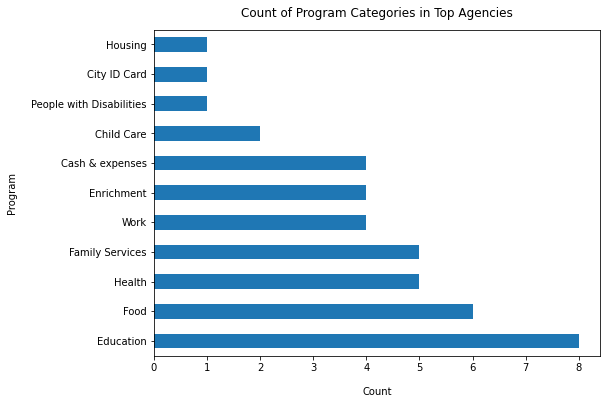

In [53]:
df_b['program_category'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Program", labelpad=14)
plt.title("Count of Program Categories in Top Agencies", y=1.02);

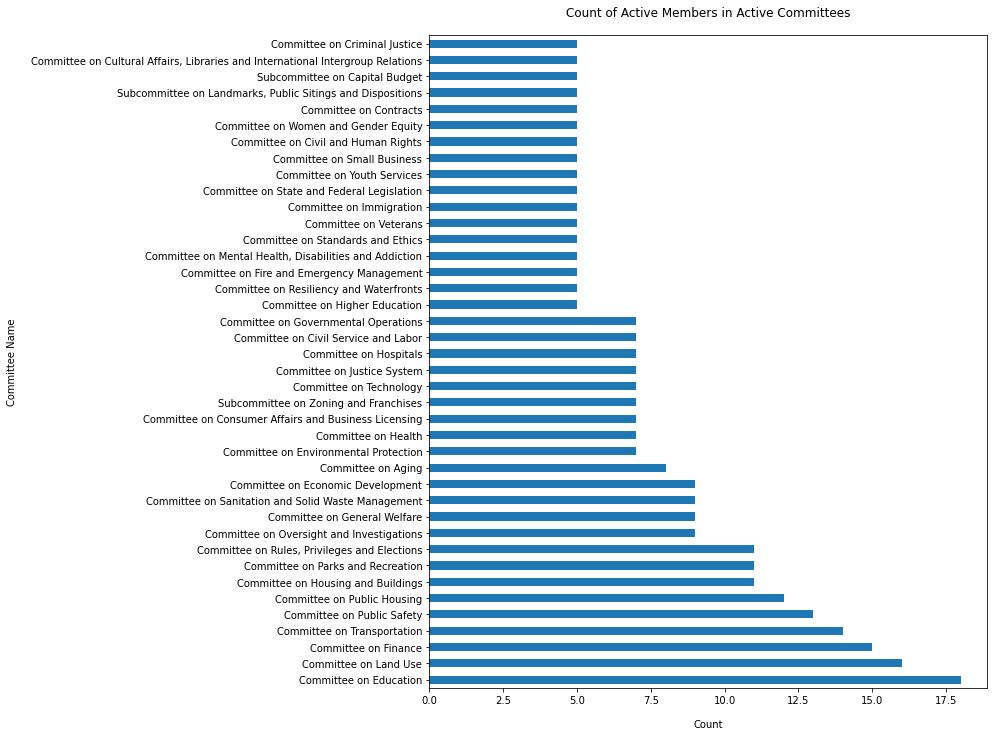

In [54]:
df_c['committeename'].value_counts().plot(kind='barh', figsize=(10,12))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Committee Name", labelpad=14)
plt.title("Count of Active Members in Active Committees", y=1.02);

Text(0.5, 0, 'Count')

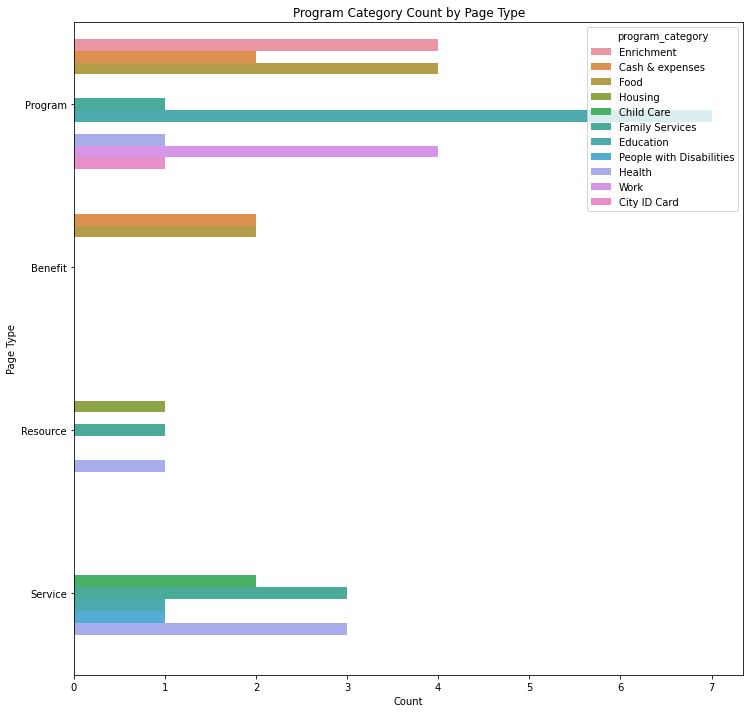

In [69]:
fig_dims = (12,12)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(y="page_type", hue="program_category", ax=ax, data=df_b)
ax.set_title('Program Category Count by Page Type')
ax.set_ylabel('Page Type')
ax.set_xlabel('Count')

Text(0.5, 0, 'Count')

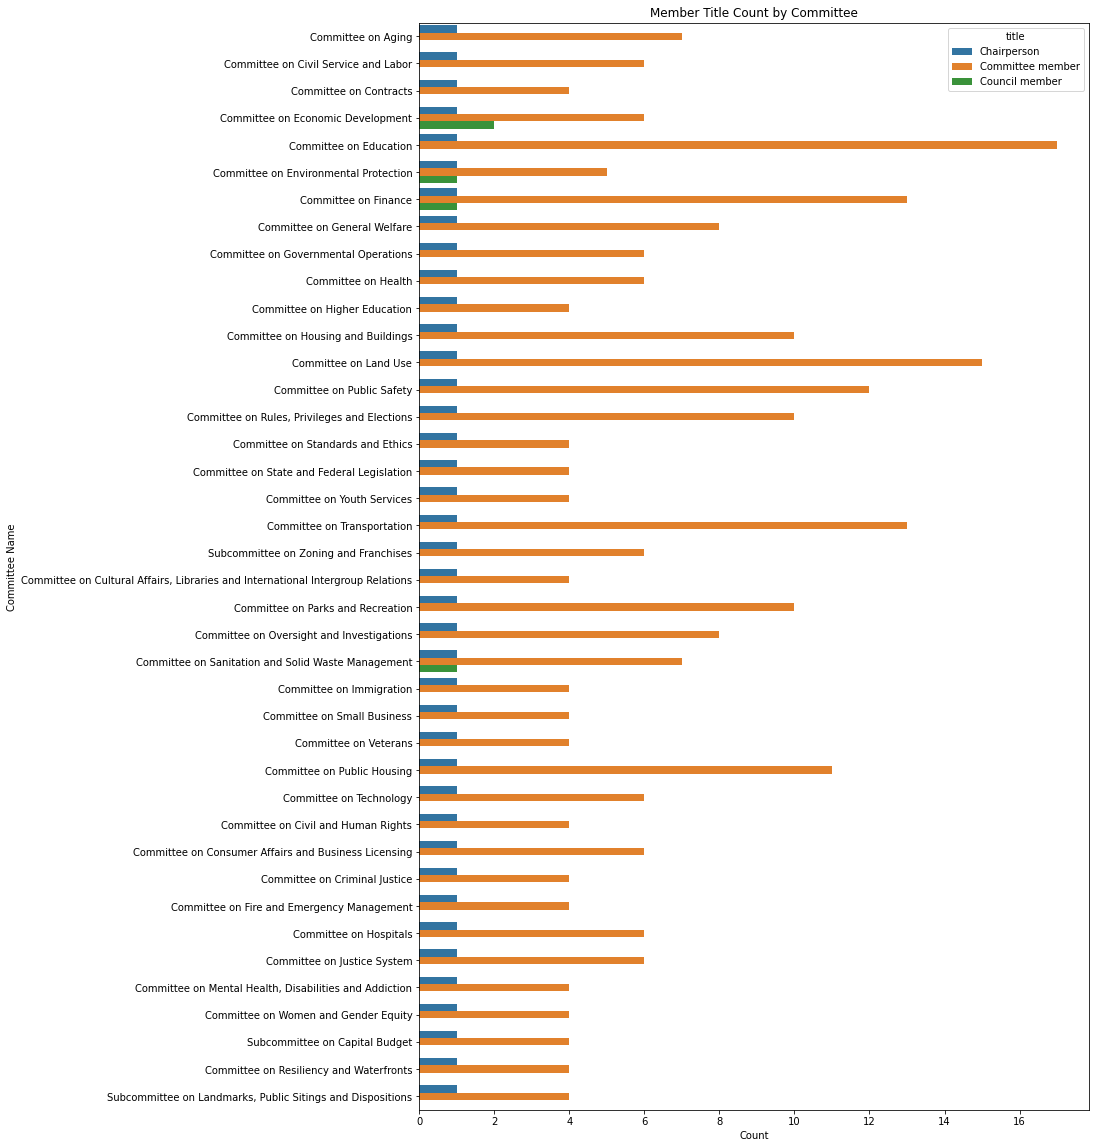

In [68]:
fig_dims = (12,20)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(y="committeename", hue="title", ax=ax, data=df_c)
ax.set_title('Member Title Count by Committee')
ax.set_ylabel('Committee Name')
ax.set_xlabel('Count')

Overall Findings

13% of NYC agencies produce 50% of the benefits and programs. These six agencies include; NYC Department of Education, NYC HR Administration, NYC Department of Youth & Community Dev, NYC DOHMH, NYC Health & Hospitals, and NYS DOH
NYC spends a lot of resources on education. The category with the most benefits and programs is education. The city council with the most members is education. 
The majority of benefits/programs available to NYC residents are programs with education being the most frequent. There are resources and services with education as well.
Majority of committees are active, committees that are no longer active include; Committee on Juvenile Justice, Committee on For-Hire Vehicles, Subcommittee on Planning, Dispositions and Concessions, Subcommittee on Landmarks, and Public Siting and Maritime Use 
87% are committee members, 12% are chairpersons, and the remaining are council members
All of the NYC committees have a chairperson and members but only four committees have council members. 
